<a href="https://colab.research.google.com/github/saritmaitra/Interest_Rate/blob/main/Interest_Rate_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install quandl

In [75]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import quandl

Let us collect historial Federal Reserve Economic SWAP rate data

In [76]:
quandl.ApiConfig.api_key = "LSQpgUzwJRoF667ZpzyL"

swapNames = ['FRED/DSWP1', 'FRED/DSWP2', 'FRED/DSWP3', 'FRED/DSWP4', 'FRED/DSWP5', 
             'FRED/DSWP7', 'FRED/DSWP10']

df1 = quandl.get(swapNames)
df1.dropna(inplace=True)
df1.columns = ["SWAP1", "SWAP2", "SWAP3", "SWAP4", "SWAP5", "SWAP7", "SWAP10"]
df1.head(3)

,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10
DATE,,,,,,,
2000-07-03,7.10,7.16,7.17,7.17,7.17,7.20,7.24
2000-07-05,7.03,7.06,7.07,7.07,7.08,7.11,7.14
2000-07-06,7.07,7.13,7.14,7.15,7.16,7.19,7.21


## Visualizing the Dataset

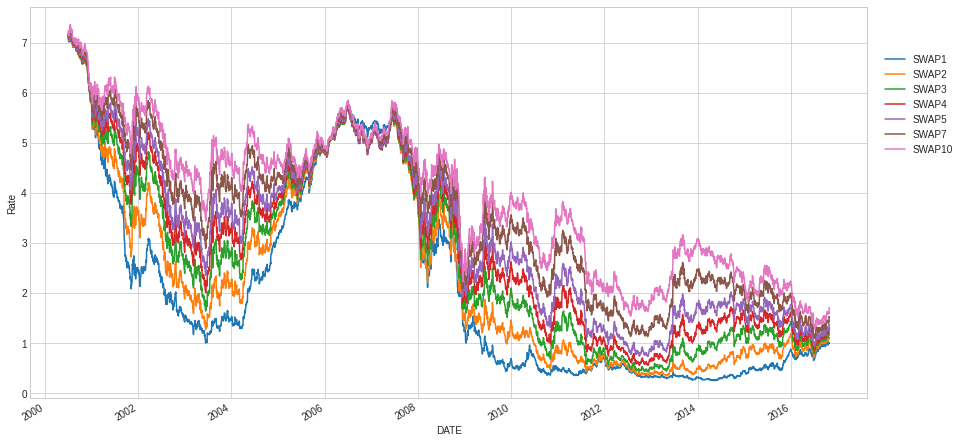

In [77]:
df1.plot(figsize=(15,8))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.grid(True)
plt.show()
    

## Principal Component Analysis:

PCA uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first loading points in the direction where data has the largest variance. One of the key features of PCA is the ability to reconstruct the initial dataset using the outputs of PCA. 

Here, we will find out optimal number of components to retain 99% variance in the data. Mathematically, PCA depends upon the eigen-decomposition of positive semi-definite matrices and upon the singular value decomposition (svd) of rectangular matrices.

### Projection onto Principal Components

In [ ]:
pip install pca

In [79]:
from sklearn.decomposition import PCA
from pca import pca
plt.style.use('seaborn-whitegrid')

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


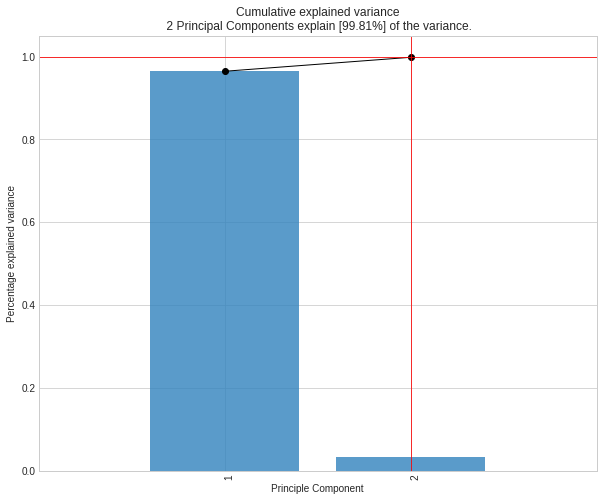

<Figure size 432x288 with 0 Axes>

[0.96436237 0.03373914]

Reduced dimensions can explain 0.9981 % of the variance in the original data

2



In [80]:
# Initialize to reduce the data up to the number of componentes that explains 99% of the variance.
model = pca(n_components = 2)
# Fit transform
x_pca = model.fit_transform(df1)
# Plot explained variance
fig, ax = model.plot()
plt.show()

x_pca = PCA(n_components = 2, svd_solver = 'full').fit(df1)
print(x_pca.explained_variance_ratio_); print()
print("Reduced dimensions can explain {:.4f}".format(sum(x_pca.explained_variance_ratio_)),
      "% of the variance in the original data"); print()
print(x_pca.components_.shape[0]); print()


We see that the first 3 principal components account for almost all of the variance in the model, and thus we should just be able to use these three components (99.96%) to reconstruct our initial dataset and retain most of the characteristics of it.

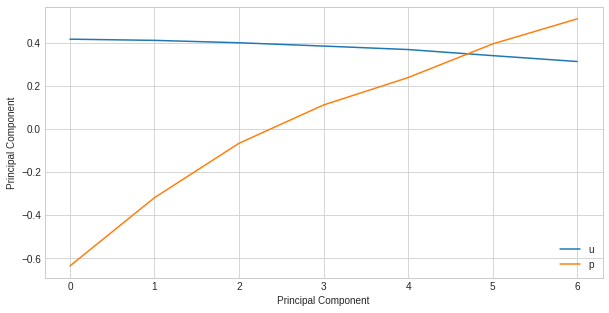

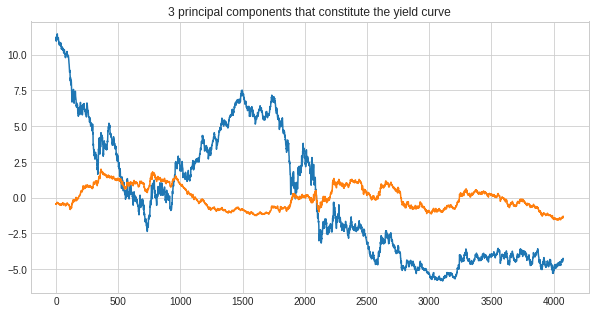

In [81]:
fig = plt.figure(figsize=(10,5))
plt.ylabel('Principal Component')
plt.plot(np.transpose(x_pca.components_))
plt.legend('upper right')
plt.xlabel('Principal Component')
plt.grid(True)
plt.show()

vals = x_pca.transform(df1)
plt.figure(figsize=(10,5))
plt.title('3 principal components that constitute the yield curve')
plt.plot(vals[:,0:3])
plt.show()

Here, I have decomposed the yield curve via its principal components.

## Treasury Rates


In [82]:
treasury = ['FRED/DGS1MO','FRED/DGS3MO','FRED/DGS6MO','FRED/DGS1',
           'FRED/DGS2','FRED/DGS3','FRED/DGS5','FRED/DGS7','FRED/DGS10',
           ]

TRdf1 = quandl.get(treasury)
TRdf1.columns = ['TR1m','TR3m', 'TR6m','TR1y','TR2y',
              'TR3y','TR5y','TR7y','TR10y']

In [83]:
TRdf1.head(3)

,TR1m,TR3m,TR6m,TR1y,TR2y,TR3y,TR5y,TR7y,TR10y
Date,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99


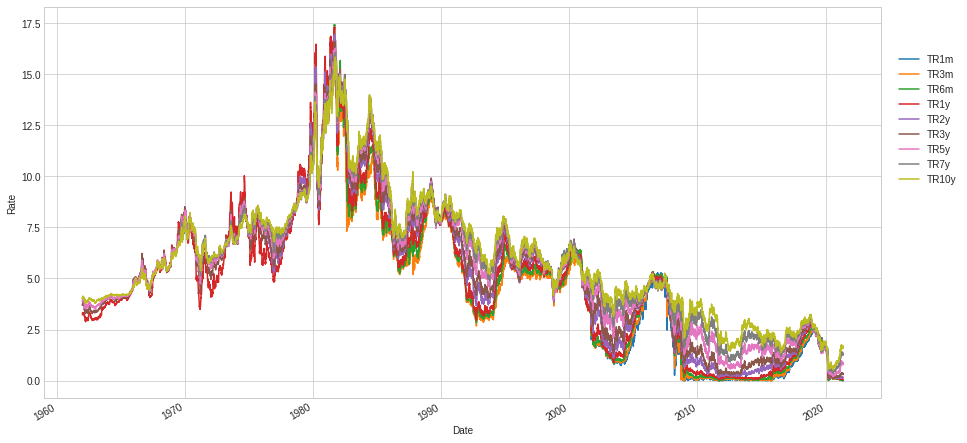

In [84]:
# df2.dropna(inplace=True)
TRdf1.plot(figsize=(15,8))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01,.9), loc=2)
plt.show()

In [85]:
# TRdf2 = TRdf1.loc[:, 3:-2]
TRdf2 = TRdf1.dropna()
combine = TRdf2.merge(df1, left_index=True, right_index=True)
combine.head()

,TR1m,TR3m,TR6m,TR1y,TR2y,TR3y,TR5y,TR7y,TR10y,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10
2001-07-31,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,3.82,4.32,4.78,5.10,5.32,5.61,5.85
2001-08-01,3.65,3.53,3.47,3.56,3.83,4.09,4.62,4.90,5.11,3.83,4.35,4.81,5.13,5.36,5.65,5.88
2001-08-02,3.65,3.53,3.46,3.57,3.89,4.17,4.69,4.97,5.17,3.84,4.39,4.85,5.17,5.40,5.68,5.91
2001-08-03,3.63,3.52,3.47,3.57,3.91,4.22,4.72,4.99,5.20,3.85,4.44,4.91,5.23,5.47,5.76,5.98
2001-08-06,3.62,3.52,3.47,3.56,3.88,4.17,4.71,4.99,5.19,3.83,4.40,4.88,5.22,5.46,5.75,5.98


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


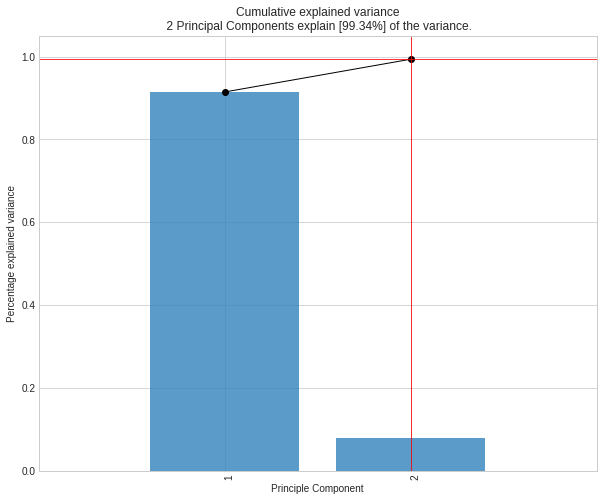

<Figure size 432x288 with 0 Axes>

[0.91434103 0.07910552]

Reduced dimensions can explain 0.9934 % of the variance in the original data

2



In [86]:
# Initialize to reduce the data up to the number of componentes that explains 99% of the variance.
TRmodel = pca(n_components = 2)
# Fit transform
trx_pca = TRmodel.fit_transform(TRdf2)
# Plot explained variance
fig, ax = TRmodel.plot()
plt.show()

trx_pca = PCA(n_components = 2, svd_solver = 'full').fit(TRdf2)
print(trx_pca.explained_variance_ratio_); print()
print("Reduced dimensions can explain {:.4f}".format(sum(trx_pca.explained_variance_ratio_)),
      "% of the variance in the original data"); print()
print(trx_pca.components_.shape[0]); print()

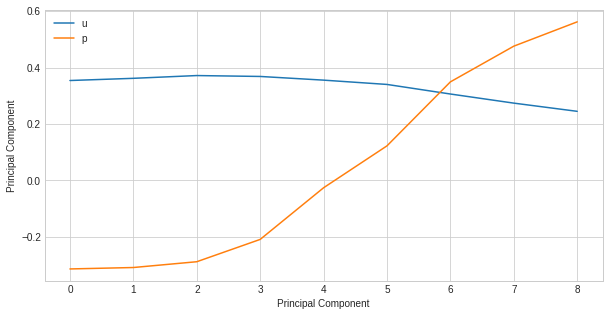

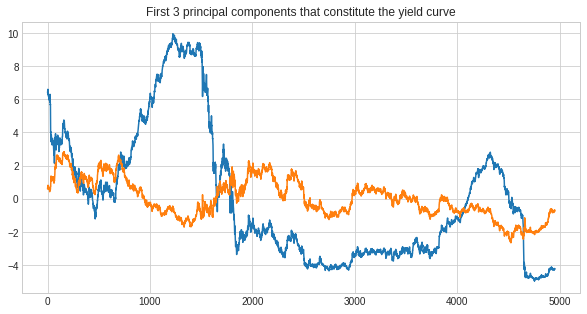

In [87]:
fig = plt.figure(figsize=(10,5))
plt.ylabel('Principal Component')
plt.plot(np.transpose(trx_pca.components_))
plt.legend('upper right')
plt.xlabel('Principal Component')
plt.grid(True)
plt.show()

vals_t = trx_pca.transform(TRdf2)
plt.figure(figsize=(10,5))
plt.plot(vals_t[:,0:3])
plt.title('First 3 principal components that constitute the yield curve')
plt.show()

## Spreads


In [88]:
spread = [combine.SWAP1-combine.TR1y, 
          combine.SWAP2-combine.TR2y,
          combine.SWAP3-combine.TR3y,
          combine.SWAP5-combine.TR5y,
          combine.SWAP7-combine.TR7y,
          combine.SWAP10-combine.TR10y]
spread_df = pd.DataFrame(np.array(spread).T, index=combine.index, 
                         columns = ["SPREAD1y", "SPREAD2y", "SPREAD3y", "SPREAD5y", "SPREAD7y", "SPREAD10y"])

In [89]:
spread_df.describe()

,SPREAD1y,SPREAD2y,SPREAD3y,SPREAD5y,SPREAD7y,SPREAD10y
count,3808.000000,3808.000000,3808.000000,3808.000000,3808.000000,3808.000000
mean,0.327261,0.346526,0.382432,0.361350,0.317416,0.291224
std,0.233182,0.220792,0.245810,0.241505,0.253132,0.251167
min,-0.040000,0.020000,-0.040000,-0.140000,-0.240000,-0.230000
25%,0.180000,0.190000,0.200000,0.160000,0.120000,0.090000
50%,0.250000,0.320000,0.380000,0.370000,0.310000,0.240000
75%,0.400000,0.410000,0.460000,0.490000,0.490000,0.510000
max,1.980000,1.690000,1.720000,1.300000,1.110000,0.970000


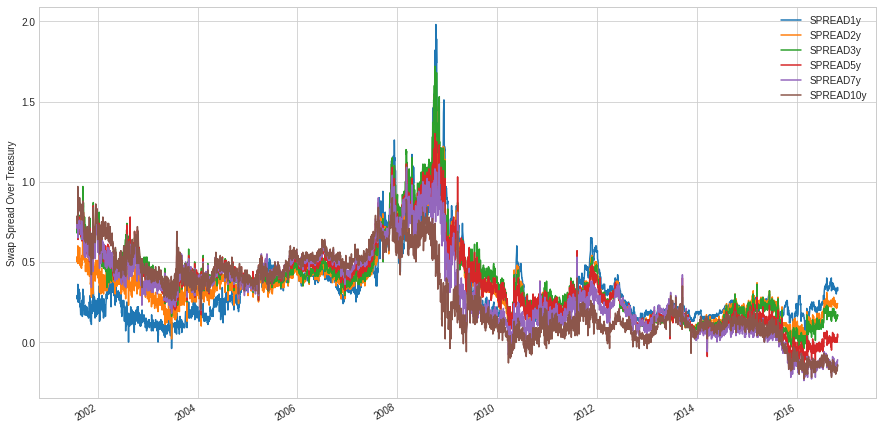

In [90]:
spread_df.plot(figsize=(15,8))
plt.ylabel("Swap Spread Over Treasury")
plt.show()

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


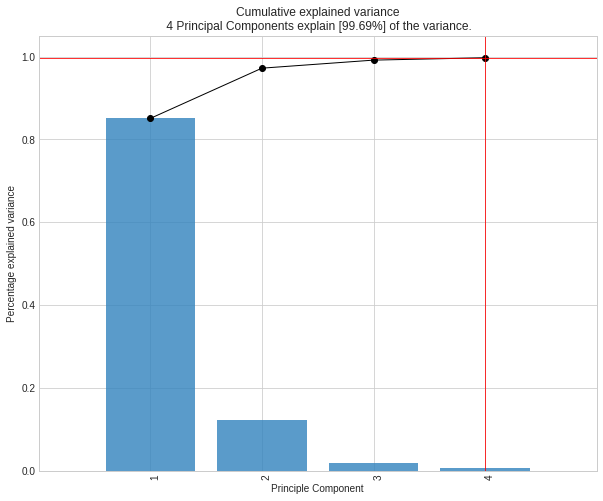

<Figure size 432x288 with 0 Axes>

[0.85049287 0.12133676 0.01943635 0.0056876 ]

Reduced dimensions can explain 0.9970 % of the variance in the original data

4



In [91]:
# Initialize to reduce the data up to the number of componentes that explains 99% of the variance.
SPmodel = pca(n_components = 4)

# Fit transform
spread_pca = SPmodel.fit_transform(spread_df)
# Plot explained variance
fig, ax = SPmodel.plot()
plt.show()

spread_pca = PCA(n_components = 4, svd_solver = 'full').fit(spread_df)
print(spread_pca.explained_variance_ratio_); print()
print("Reduced dimensions can explain {:.4f}".format(sum(spread_pca.explained_variance_ratio_)),
      "% of the variance in the original data"); print()
print(spread_pca.components_.shape[0]); print()

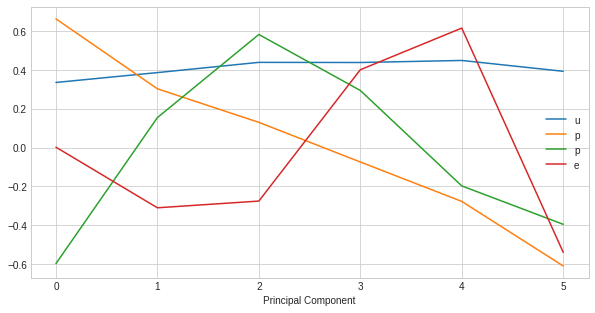

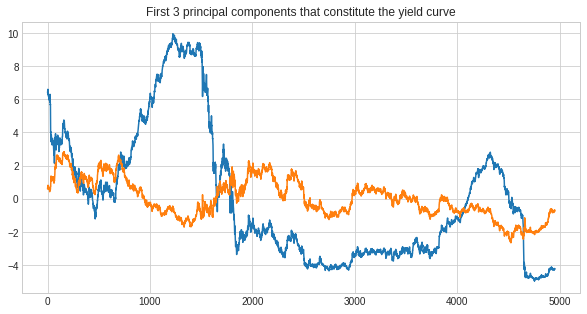

In [92]:
fig = plt.figure(figsize=(10,5))
plt.xlabel('Principal Component')
plt.plot(np.transpose(spread_pca.components_))
plt.legend('upper right')
plt.grid(True)
plt.show()

vals_s = spread_pca.transform(spread_df)
plt.figure(figsize=(10,5))
plt.plot(vals_t[:,0:3])
plt.title('First 3 principal components that constitute the yield curve')
plt.show()

In [93]:
def VasicekNextRate(r, kappa, theta, sigma, dt=1/252):
    # Implements above closed form solution     
    val1 = np.exp(-1*kappa*dt)
    val2 = (sigma**2)*(1-val1**2) / (2*kappa)
    out = r*val1 + theta*(1-val1) + (np.sqrt(val2))*np.random.normal()
    return out

In [94]:
def VasicekSim(N, r0, kappa, theta, sigma, dt = 1/252):
    short_r = [0]*N # Create array to store rates     
    short_r[0] = r0 # Initialise rates at $r_0$     
    
    for i in range(1,N):
        short_r[i] = VasicekNextRate(short_r[i-1], kappa, theta, sigma, dt)
    
    return short_r

In [95]:
def VasicekMultiSim(M, N, r0, kappa, theta, sigma, dt = 1/252):
    sim_arr = np.ndarray((N, M))
    
    for i in range(0,M):
        sim_arr[:, i] = VasicekSim(N, r0, kappa, theta, sigma, dt)
    
    return sim_arr

In [96]:
def VasicekCalibration(rates, dt=1/252):
    n = len(rates)
    
    # Implement MLE to calibrate parameters     
    Ax = sum(rates[0:(n-1)])
    Ay = sum(rates[1:n])
    Axx = np.dot(rates[0:(n-1)], rates[0:(n-1)])
    Axy = np.dot(rates[0:(n-1)], rates[1:n])
    Ayy = np.dot(rates[1:n], rates[1:n])
    
    theta = (Ay * Axx - Ax * Axy) / (n * (Axx - Axy) - (Ax**2 - Ax*Ay))
    kappa = -np.log((Axy - theta * Ax - theta * Ay + n * theta**2) / (Axx - 2*theta*Ax + n*theta**2)) / dt
    a = np.exp(-kappa * dt)
    sigmah2 = (Ayy - 2*a*Axy + a**2 * Axx - 2*theta*(1-a)*(Ay - a*Ax) + n*theta**2 * (1-a)**2) / n
    sigma = np.sqrt(sigmah2*2*kappa / (1-a**2))
    r0 = rates[n-1]
    
    return [kappa, theta, sigma, r0]

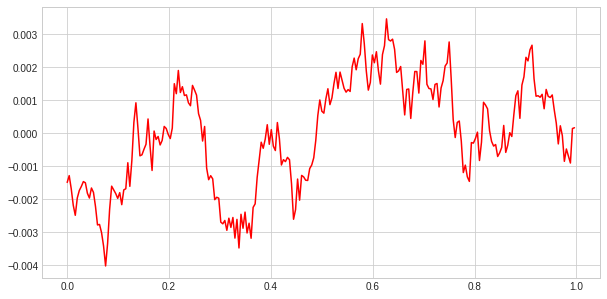

In [115]:
params = VasicekCalibration(spread_df.loc[:, 'SPREAD10y'].dropna()/100)
kappa = params[0]
theta = params[1]
sigma = params[2]
r0 = params[3]

years = 1
N = years * 252
t = np.arange(0,N)/252

test_sim = VasicekSim(N, r0, kappa, theta, sigma, 1/252)
plt.figure(figsize=(10,5))
plt.plot(t,test_sim, color='r')
plt.show()

For the simulation we assume that we have 252 discrete hedge points (which is roughly the amount of trading  days in a year).

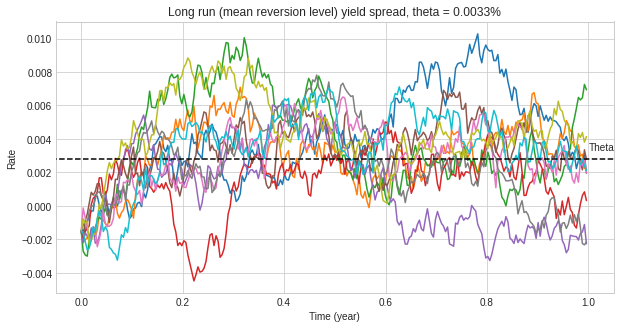

In [98]:
M = 10
rates_arr = VasicekMultiSim(M, N, r0, kappa, theta, sigma)
plt.figure(figsize=(10,5))
plt.plot(t,rates_arr)
plt.hlines(y=theta, xmin = -100, xmax=100, zorder=10, linestyles = 'dashed', label='Theta')
plt.annotate('Theta', xy=(1.0, theta+0.0005))
plt.xlim(-0.05, 1.05)
plt.ylabel("Rate")
plt.xlabel("Time (year)")
plt.title('Long run (mean reversion level) yield spread, theta = 0.0033%')
plt.show()

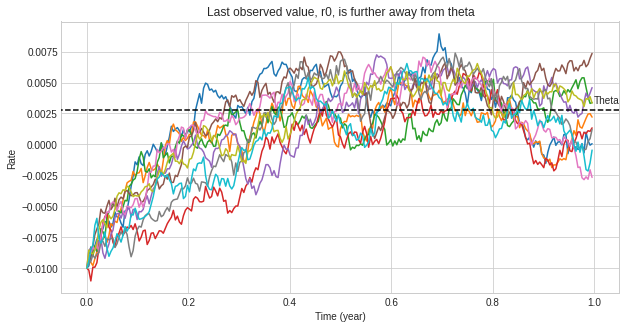

In [99]:
M = 10
rates_arr = VasicekMultiSim(M, N, -0.01, kappa, theta, sigma)
plt.figure(figsize=(10,5))
plt.plot(t,rates_arr)
plt.hlines(y=theta, xmin = -100, xmax=100, zorder=10, linestyles = 'dashed', label='Theta')
plt.annotate('Theta', xy=(1.0, theta+0.0005))
plt.xlim(-0.05, 1.05)
plt.ylabel("Rate")
plt.xlabel("Time (year)")
plt.title('Last observed value, r0, is further away from theta')
plt.show()


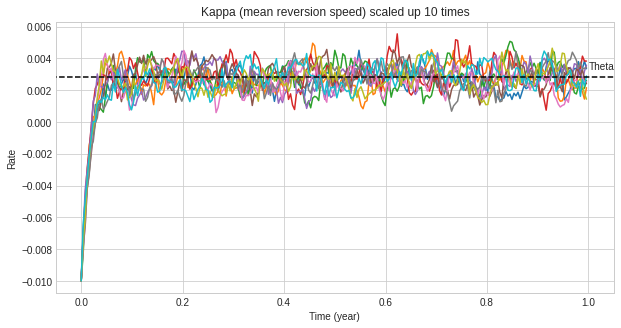

In [100]:
M = 10
rates_arr = VasicekMultiSim(M, N, -0.01, kappa*10, theta, sigma)
plt.figure(figsize=(10,5))
plt.plot(t,rates_arr)
plt.hlines(y=theta, xmin = -100, xmax=100, zorder=10, linestyles = 'dashed', label='Theta')
plt.annotate('Theta', xy=(1.0, theta+0.0005))
plt.xlim(-0.05, 1.05)
plt.ylabel("Rate")
plt.xlabel("Time (year)")
plt.title("Kappa (mean reversion speed) scaled up 10 times")
plt.show()

Increasing the speed of the mean reversion intensifies the pace at which yieldsp converges to its long-run level θ . Below, when σ shoots up by 5 times, volatility rises, increasing the fluctuations in the ex-ante paths of yieldsp, making it harder to converge to the θ level of yield spread

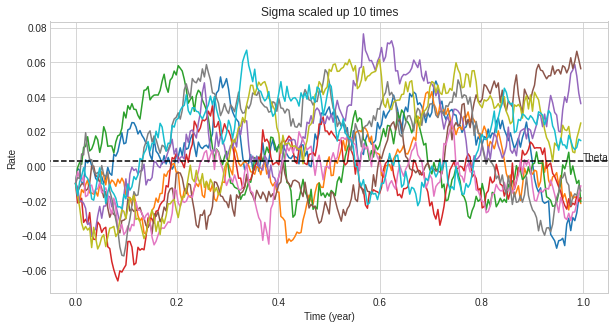

In [101]:
M = 10
rates_arr = VasicekMultiSim(M, N, -0.01, kappa, theta, sigma*10)
plt.figure(figsize=(10,5))
plt.plot(t,rates_arr)
plt.hlines(y=theta, xmin = -100, xmax=100, zorder=10, linestyles = 'dashed', label='Theta')
plt.annotate('Theta', xy=(1.0, theta+0.0005))
plt.xlim(-0.05, 1.05)
plt.ylabel("Rate")
plt.xlabel("Time (year)")
plt.title("Sigma scaled up 10 times")
plt.show()

Thus, knowing the long-run value of the short-term yield spread rates θ and the mean-reversion adjustment rate k enables us to calculate the evolution of the yield spread rates using the Vasicek model. 

Some of the caveats of the Vasicek model include that, firstly, the equation can only analyze one market risk factor at a time. Secondly, the long
term rates have a relatively larger effect on the short-term rates than the short-term rates themselves. 

